## Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

 <img src = https://www.bmw-me.com/content/dam/bmw/common/home/teaser/g70-bmw-7-series-sedan-lci-hometeaser-desktop.jpg.asset.1655371854647.jpg width="600" align='center'>


They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

### Business Goal

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

### Importing necessary Libraries

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
import folium
from folium.plugins import HeatMap

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import HuberRegressor

from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
import tensorflow as tf

pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

## EDA & Data Preprocessing

<b>Exploratory Data Analysis</b>, or EDA, is an important step in any Data Analysis or Data Science project. EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

<img src=https://i.ytimg.com/vi/pKsGE7wqQks/maxresdefault.jpg width="500"/>

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better. In this article, we will understand EDA with the help of an example dataset. We will use Python language (Pandas library) for this purpose.


<b>Data preprocessing</b>, a component of data preparation, describes any type of processing performed on raw data to prepare it for another data processing procedure. It has traditionally been an important preliminary step for the data mining process. More recently, data preprocessing techniques have been adapted for training machine learning models and AI models and for running inferences against them.

<img src="https://cdn-blog.scalablepath.com/uploads/2021/11/data-preprocessing-744x400-1.png" width="500"/>

Data preprocessing transforms the data into a format that is more easily and effectively processed in data mining, machine learning and other data science tasks. The techniques are generally used at the earliest stages of the machine learning and AI development pipeline to ensure accurate results.

There are several different tools and methods used for preprocessing data, including the following

* sampling, which selects a representative subset from a large population of data.
* transformation, which manipulates raw data to produce a single input.
* denoising, which removes noise from data.
* imputation, which synthesizes statistically relevant data for missing values.
* normalization, which organizes data for more efficient access.
* feature extraction, which pulls out a relevant feature subset that is significant in a particular context.


### Loading and Exploring the dataset

In [80]:
df = pd.read_csv("../input/car-price-prediction/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [82]:
df.describe(include='all').style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,nan,nan,147,2,2,2,5,3,2,nan,nan,nan,nan,nan,7,7,nan,8,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,nan,toyota corona,gas,std,four,sedan,fwd,front,nan,nan,nan,nan,nan,ohc,four,nan,mpfi,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,nan,6,185,168,115,96,120,202,nan,nan,nan,nan,nan,148,159,nan,94,nan,nan,nan,nan,nan,nan,nan,nan
mean,103.000000,0.834146,nan,nan,nan,nan,nan,nan,nan,98.756585,174.049268,65.907805,53.724878,2555.565854,nan,nan,126.907317,nan,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,nan,nan,nan,nan,nan,nan,nan,6.021776,12.337289,2.145204,2.443522,520.680204,nan,nan,41.642693,nan,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,nan,nan,nan,nan,nan,nan,nan,86.600000,141.100000,60.300000,47.800000,1488.000000,nan,nan,61.000000,nan,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,nan,nan,nan,nan,nan,nan,nan,94.500000,166.300000,64.100000,52.000000,2145.000000,nan,nan,97.000000,nan,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,97.000000,173.200000,65.500000,54.100000,2414.000000,nan,nan,120.000000,nan,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,nan,nan,nan,nan,nan,nan,nan,102.400000,183.100000,66.900000,55.500000,2935.000000,nan,nan,141.000000,nan,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


## Data Visualization

array([[<AxesSubplot:title={'center':'car_ID'}>,
        <AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>],
       [<AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>],
       [<AxesSubplot:title={'center':'boreratio'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

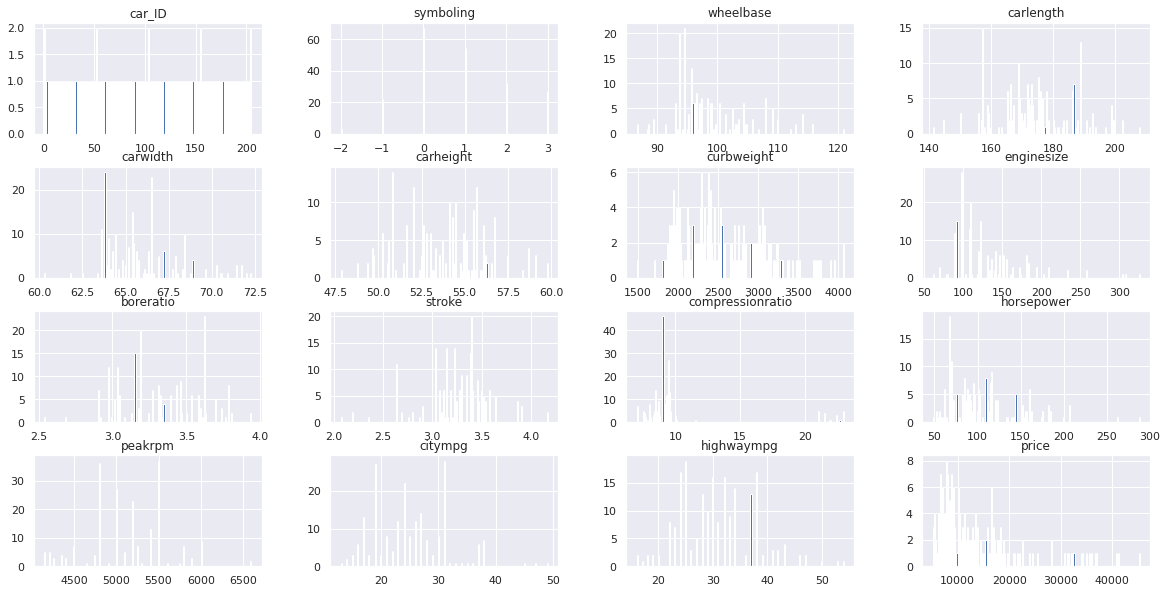

In [83]:
df.hist(bins=200,figsize=[20,10])

In [84]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

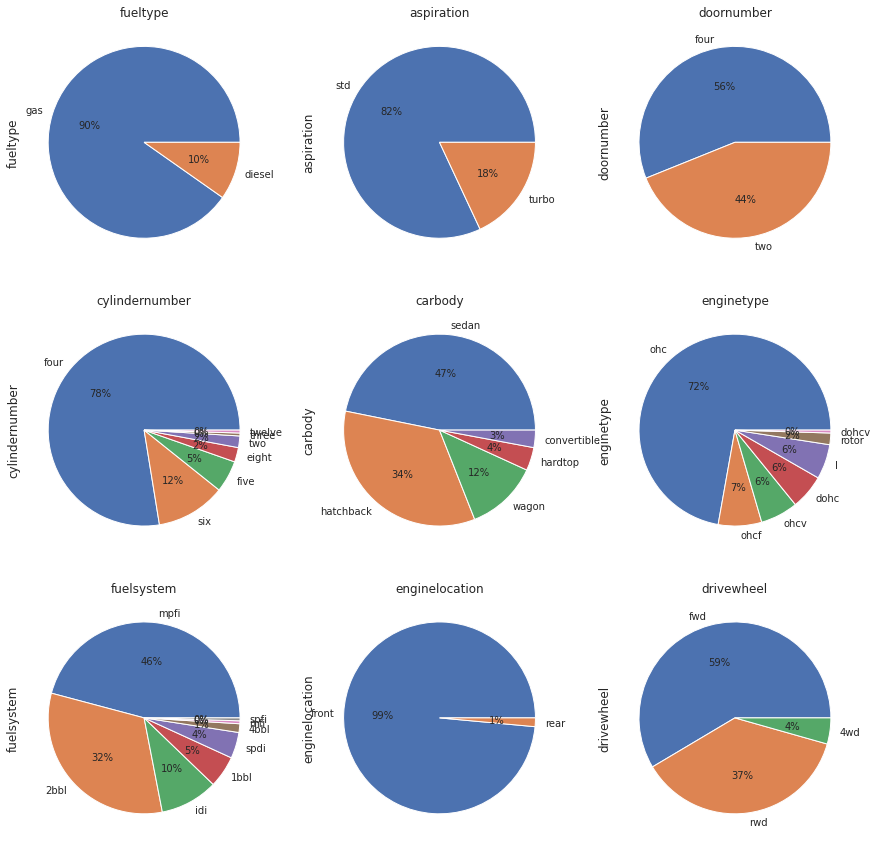

In [85]:
pie_plot(df, ['fueltype', 'aspiration', 'doornumber', 'cylindernumber', 'carbody', 'enginetype', 'fuelsystem', 'enginelocation', 'drivewheel'], 3, 3)

### Checking for missing valuessns.heatmap(df.isnull())

<AxesSubplot:>

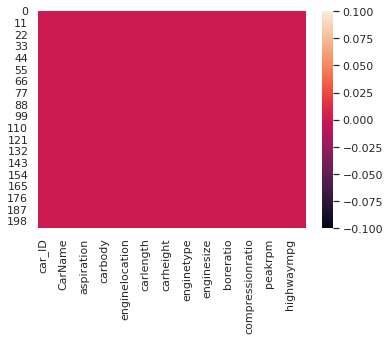

In [86]:
sns.heatmap(df.isnull())

The heatmap clearly shows there are no missing values in our dataset

### Dropping duplicated if any exists

In [87]:
df_c = df.copy()

In [88]:
df_c = df_c.drop_duplicates()

In [89]:
print("Before dropping duplicates {} after dropping duplicates {}".format(df.shape[0], df_c.shape[0]))

Before dropping duplicates 205 after dropping duplicates 205


It's clear that our dataset doesn't contain any duplicates

## Categorical data encoding
<img src="https://miro.medium.com/max/1400/1*TuPcb9C8rIkmpP3dZ3fp_w.png" width="600"/>

### Label Encoding
 is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.
### Label Encoding challenges
 there is a very high probability that the model captures the relationship between values like they were ordinal which isn't suitble for example for ocean proximity here.

### One-Hot Encoding

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

In [90]:
df_c['doornumber'].replace({'two':2, 'four':4}, inplace=True)
df_c['cylindernumber'].replace({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}, inplace=True)

In [91]:
df_c = pd.get_dummies(df_c, columns = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'])

As we all know a car's brand really affects it's price so we'll be also encoding car names into usable variables by the model this will increase the dataframe size but will be really relevant for our analysis.

In [92]:
car_names = df_c['CarName'].tolist()

In [93]:
unique_names = []
for car in car_names:
    unique_names.append(car.split()[0])
unique_names = set(unique_names)

In [94]:
for i, c in enumerate(df_c["CarName"]):
    for u in unique_names:
        if u in c:
            df_c['CarName'].iloc[i] = u

In [95]:
df_c = pd.get_dummies(df_c, columns = ['CarName'])

In [96]:
df_c.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarName_Nissan,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_maxda,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porcshce,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_toyouta,CarName_vokswagen,CarName_volkswagen,CarName_volvo,CarName_vw
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Dealing with outliers
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations.
Two activities are essential for characterizing a set of data:

* Examination of the overall shape of the graphed data for important features, including symmetry and departures from assumptions.
* Examination of the data for unusual observations that are far removed from the mass of data. These points are often referred to as outliers. Two graphical techniques for identifying outliers, scatter plots and box plots, along with an analytic procedure for detecting outliers when the distribution is normal (Grubbs' Test)

In [97]:
def box_plot(num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(df_c[l], palette="flare")

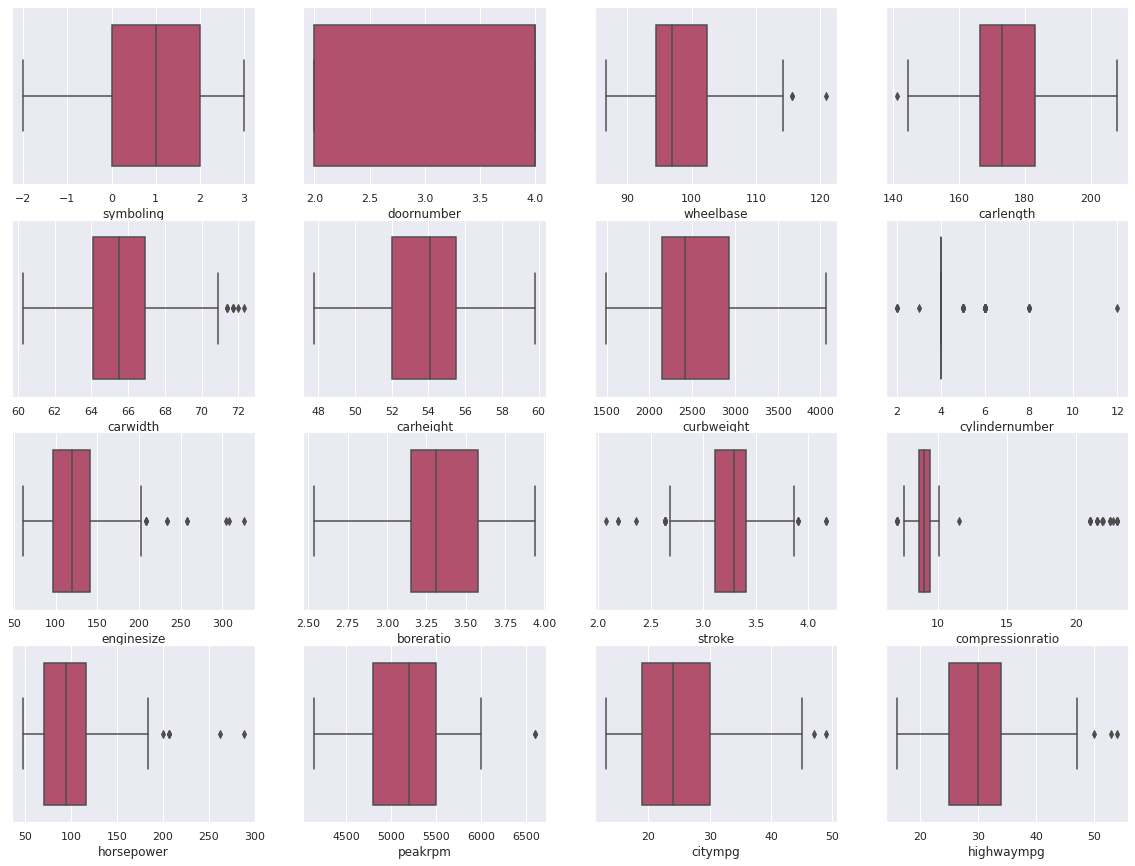

In [98]:
box_plot(['symboling','doornumber', 'wheelbase', 'carlength', 'carwidth'
                  , 'carheight', 'curbweight','cylindernumber', 'enginesize', 'boreratio'
                 ,'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'])

### Note
Don't get confused about the outliers in the dataset as they are happenning due to exotic cars for special tasks with high performance so we will not be discarding them.

In [99]:
def corr(x, y, **kwargs):
    coef = np.corrcoef(x, y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 2))
    ax = plt.gca()
    ax.annotate(label, xy = (0.3, 1), size = 30, xycoords = ax.transAxes)

In [100]:
df_c.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarName_Nissan,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_maxda,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porcshce,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_toyouta,CarName_vokswagen,CarName_volkswagen,CarName_volvo,CarName_vw
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
def scatter_features(l):
    g = sns.PairGrid(df_c,y_vars='price',x_vars=df_c[l].columns, height=5)
    g.map(plt.scatter,color='darkred',alpha=0.2)
    g.map(corr)
    plt.show()

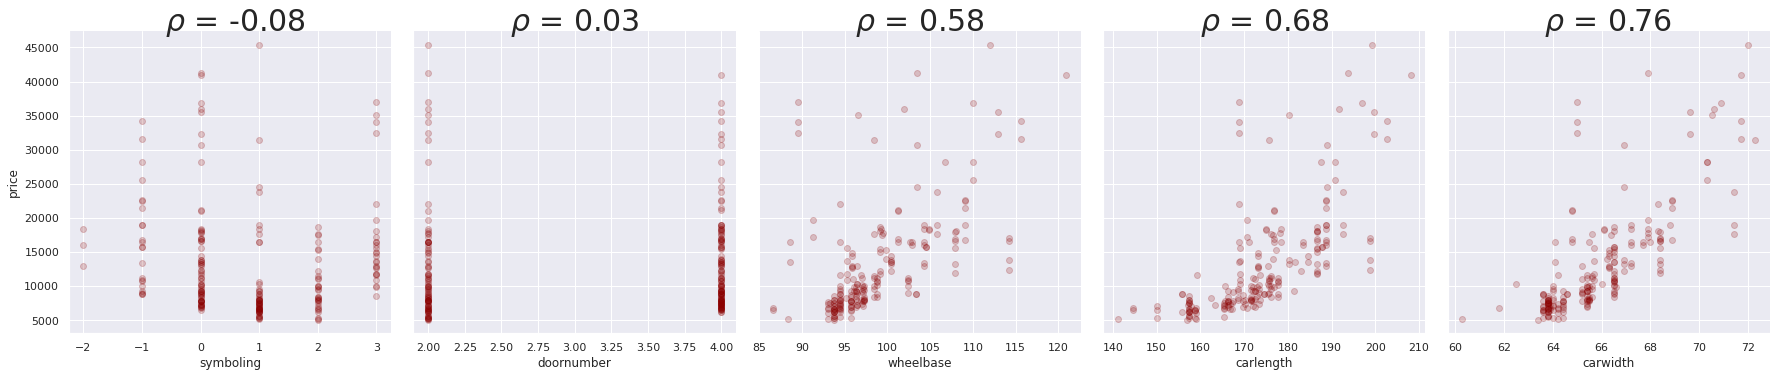

In [102]:
scatter_features(['symboling','doornumber', 'wheelbase', 'carlength', 'carwidth'])

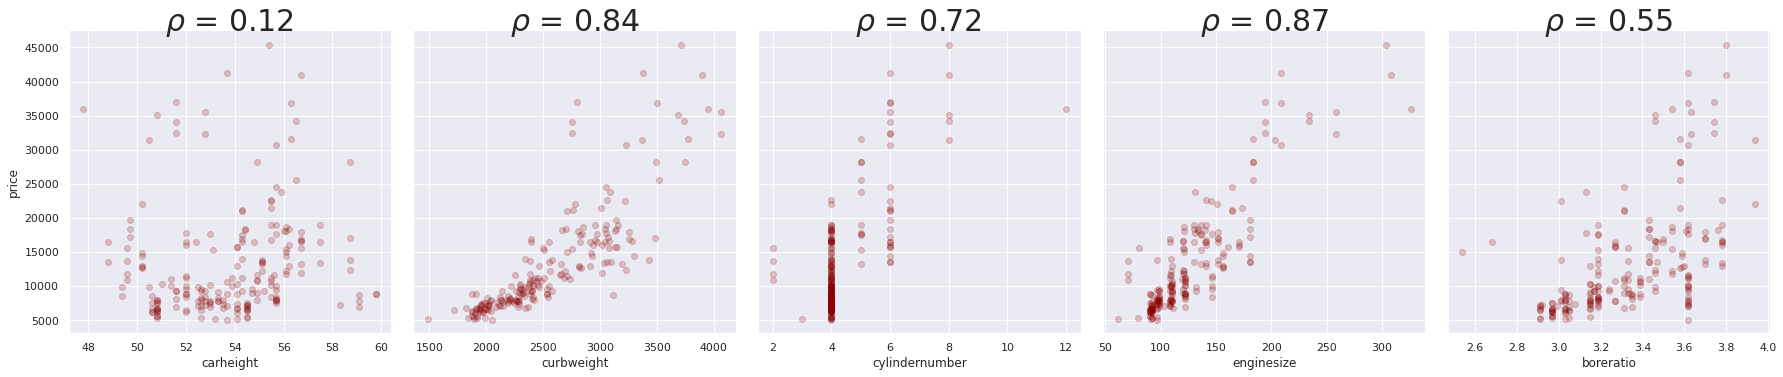

In [103]:
scatter_features(['carheight', 'curbweight','cylindernumber', 'enginesize', 'boreratio'])

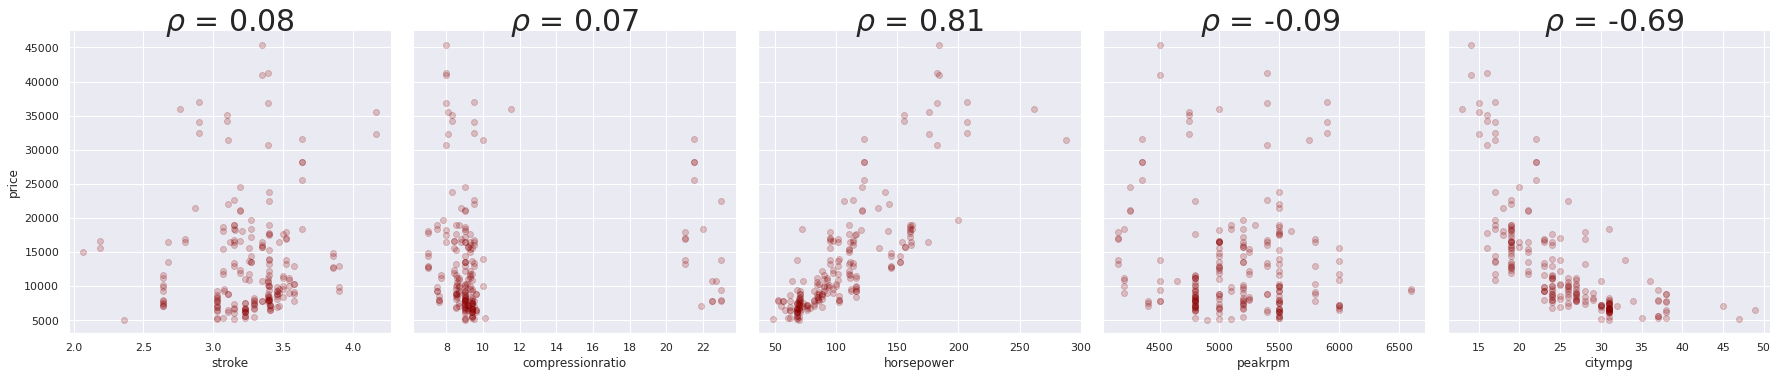

In [104]:
scatter_features(['stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg'])

## Checking multicollinearity with VIF
Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

<img src="http://ai-ml-analytics.com/wp-content/uploads/2020/07/VIF_variance_inflation_factor.gif" width="250"/>

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = df_c.loc[:, df_c.columns != 'price']

vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,feature,VIF
0,car_ID,738.507773
1,symboling,6.913552
2,doornumber,4.079685
3,wheelbase,20.542005
4,carlength,23.591722
5,carwidth,16.312116
6,carheight,8.538720
7,curbweight,42.153316
8,cylindernumber,29.426224
9,enginesize,64.268827


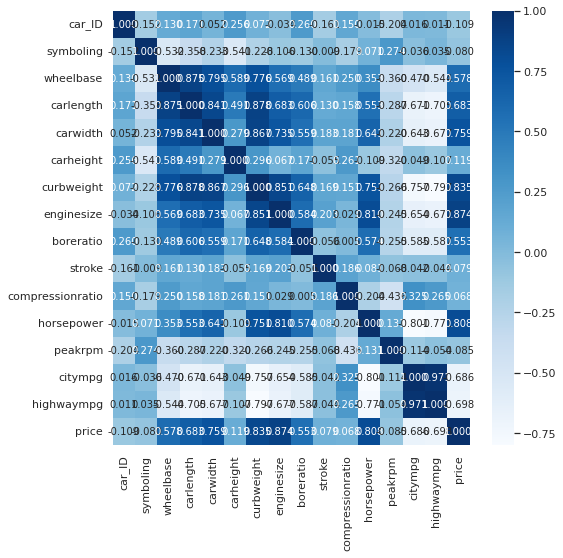

In [106]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.3f')
plt.show()

We can't discard a feature like compression ratio as it indicates combustion efficeincy of an engine so for this while modeling we'll be using a Ridge regressor to check the performance comparison as it's immune to multicolinearity.

## Handling numirical data
<img src=https://files.realpython.com/media/How-to-Round-Numbers-in-Python_Watermark.6fb8573ce8f5.jpg width="600"/>

#### StandardScaler
follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. 

#### MinMaxScaler 
scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005]. 
In the presence of outliers, StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values. 
By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset. 

In [107]:
df_num_clean = df_c[['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg']].copy()

In [108]:
df_num_clean.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22


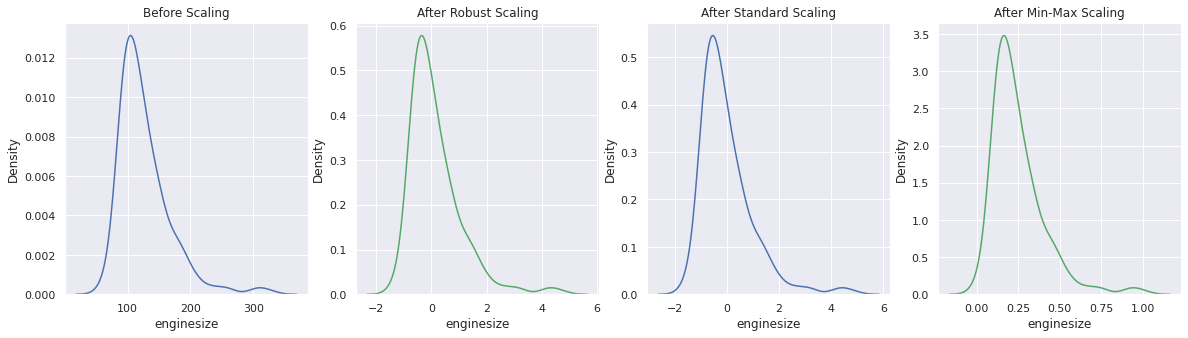

In [109]:
cols = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg']
scaler = preprocessing.RobustScaler()
robust_df_ = scaler.fit_transform(df_num_clean)
robust_df_ = pd.DataFrame(robust_df_, columns =cols)
  
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df_num_clean)
standard_df = pd.DataFrame(standard_df, columns =cols)
  
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df_num_clean)
minmax_df = pd.DataFrame(minmax_df, columns =cols)
  
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
  
sns.kdeplot(df_num_clean['enginesize'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
  
sns.kdeplot(robust_df_['enginesize'], ax = ax2, color ='g')
ax3.set_title('After Standard Scaling')
  
sns.kdeplot(standard_df['enginesize'], ax = ax3, color ='b')
ax4.set_title('After Min-Max Scaling')
  
sns.kdeplot(minmax_df['enginesize'], ax = ax4, color ='g')
plt.show()

In [110]:
def RobustScaling(df_num, cols):
    scaler = preprocessing.RobustScaler()
    robust_df_temp = scaler.fit_transform(df_num)
    robust_df_temp = pd.DataFrame(robust_df_temp, columns =cols)
    return robust_df_temp

In [111]:
robust_scaled = RobustScaling(df_num_clean, ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg'])

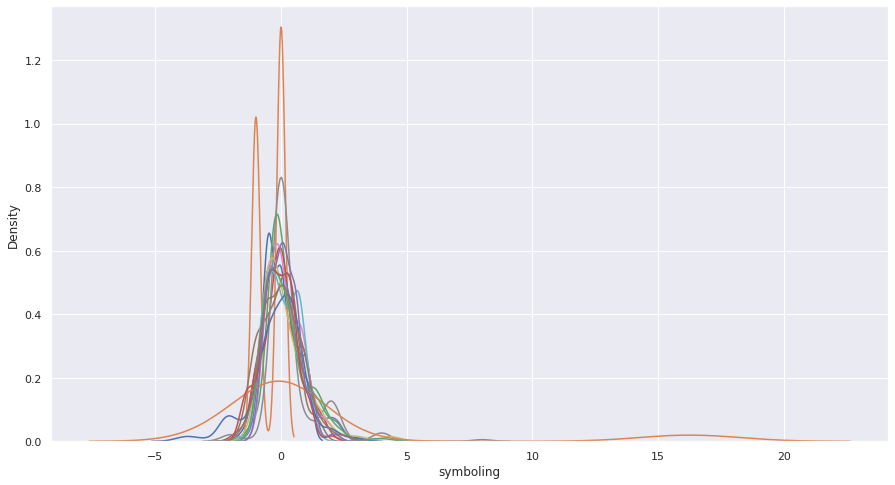

In [112]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in cols:
    sns.kdeplot(robust_scaled[i], legend=True)

### Explaination for the Compression ratio outlier values and why we should keep them

Every engine has a specific compression ratio. The air-fuel mixture is compressed in the cylinder to create an ignition, the force of which depends on the compression ratio: the volume of the cylinder when the piston is at the bottom of its stroke versus the volume of the cylinder when the piston is at the top of its stroke. Incidentally, you should know that engine displacement refers to the total capacity of all the pistons during a complete cycle.

<img src=https://picolio.auto123.com/art-images/152479/ford-shelby-gt500-2013_i1.jpg width="400"/>

Compression ratios usually range from 8:1 to 10:1. A higher compression ratio -- say, <b>from 12:1 to 14:1</b> -- means higher combustion efficiency. However, when it comes to diesel engines, the absence of spark plugs requires a higher compression ratio -- <b>from about 14:1 to as much as 22:1</b>. They use hot air to vaporize and then ignite the fuel. 

In [113]:
robust_scaled.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.0,-1.0,-1.063291,-0.261905,-0.500000,-1.514286,0.169620,0.0,0.227273,0.372093,-2.033333,0.00,0.347826,-0.285714,-0.272727,-0.333333
1,1.0,-1.0,-1.063291,-0.261905,-0.500000,-1.514286,0.169620,0.0,0.227273,0.372093,-2.033333,0.00,0.347826,-0.285714,-0.272727,-0.333333
2,0.0,-1.0,-0.316456,-0.119048,0.000000,-0.485714,0.517722,2.0,0.727273,-1.465116,0.600000,0.00,1.282609,-0.285714,-0.454545,-0.444444
3,0.5,0.0,0.354430,0.202381,0.250000,0.057143,-0.097468,0.0,-0.250000,-0.279070,0.366667,1.25,0.152174,0.428571,0.000000,0.000000
4,0.5,0.0,0.303797,0.202381,0.321429,0.057143,0.518987,1.0,0.363636,-0.279070,0.366667,-1.25,0.434783,0.428571,-0.545455,-0.888889


In [114]:
clean_df = df_c.copy()
clean_df.drop(labels=['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg'], axis="columns", inplace=True)
clean_df[['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg']] = robust_scaled[['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight' 
               ,'curbweight' ,'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio'
               ,'horsepower' ,'peakrpm', 'citympg' ,'highwaympg']]
clean_df = clean_df.drop('car_ID', axis=1)

In [115]:
clean_df.head()

,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarName_Nissan,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_maxda,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porcshce,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_toyouta,CarName_vokswagen,CarName_volkswagen,CarName_volvo,CarName_vw,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,13495.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,-1.0,-1.063291,-0.261905,-0.500000,-1.514286,0.169620,0.0,0.227273,0.372093,-2.033333,0.00,0.347826,-0.285714,-0.272727,-0.333333
1,16500.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,-1.0,-1.063291,-0.261905,-0.500000,-1.514286,0.169620,0.0,0.227273,0.372093,-2.033333,0.00,0.347826,-0.285714,-0.272727,-0.333333
2,16500.0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-1.0,-0.316456,-0.119048,0.000000,-0.485714,0.517722,2.0,0.727273,-1.465116,0.600000,0.00,1.282609,-0.285714,-0.454545,-0.444444
3,13950.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.0,0.354430,0.202381,0.250000,0.057143,-0.097468,0.0,-0.250000,-0.279070,0.366667,1.25,0.152174,0.428571,0.000000,0.000000
4,17450.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.0,0.303797,0.202381,0.321429,0.057143,0.518987,1.0,0.363636,-0.279070,0.366667,-1.25,0.434783,0.428571,-0.545455,-0.888889


## Summary of Data Preprocessing
The data went through the process of cleaning as follows:
* Explored and visualized the data
* Handled categorical data encoding using one hot encoder which is more suitble for the case
* Handled numerical values using a Robust Scaler

## Modeling
The process of modeling means training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data. The output from modeling is a trained model that can be used for inference, making predictions on new data points.

<img src="https://docs.microsoft.com/en-us/windows/ai/images/winml-model-flow.png" width="600"/>

A machine learning model itself is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.
Once you have trained the model, you can use it to reason over data that it hasn't seen before, and make predictions about those data. For example, let's say you want to build an application that can recognize a user's emotions based on their facial expressions. You can train a model by providing it with images of faces that are each tagged with a certain emotion, and then you can use that model in an application that can recognize any user's emotion

In [116]:
x_clean = clean_df.drop(['price'] , axis = 1).values
y_clean = clean_df['price'].values

### Principal Component Analysis

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

<img src = https://hands-on.cloud/wp-content/uploads/2022/02/Implementing-Principal-component-analysis-PCA-using-Python.png width = "600"/>

#### Advantages of PCA

There are two main advantages of dimensionality reduction with PCA.

* The training time of the algorithms reduces significantly with less number of features.
* It is not always possible to analyze data in high dimensions. For instance if there are 100 features in a dataset. Total number of scatter plots required to visualize the data would be 100(100-1)2 = 4950. Practically it is not possible to analyze data this way.


In [117]:
x_clean.shape

(205, 73)

In [122]:
pca = PCA(n_components=0.99)
x_reduced = pca.fit_transform(x_clean)

In [123]:
print("Number of original features is {} and of reduced features is {}".format(x_clean.shape[1], x_reduced.shape[1]))

Number of original features is 73 and of reduced features is 29


In [124]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(x_clean, y_clean, test_size=0.1, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x_reduced, y_clean, test_size=0.1, random_state=42)

In [125]:
clean_evals = dict()
reduced_evals = dict()
def evaluate_regression(evals, model, name, X_train, X_test, y_train, y_test):
    train_error = mean_squared_error(y_train, model.predict(X_train), squared=False)
    test_error = mean_squared_error(y_test, model.predict(X_test), squared=False)
    r2_train = r2_score(y_train, model.predict(X_train))
    r2_test = r2_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_error, test_error, r2_train, r2_test]
    print("Training Error " + str(name) + " {}  Test error ".format(train_error) + str(name) + " {}".format(test_error))
    print("R2 score for " + str(name) + " training is {} ".format(r2_train*100) + " and for test is {}".format(r2_test*100))

In [126]:
def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
    plt.figure(figsize=(10,6))
    plt.plot(df[:20])
    plt.legend(['Actual' , 'Predicted'])

### Linear and Lasso Regression models

In [127]:
lr = LinearRegression().fit(X_train_clean, y_train_clean)
evaluate_regression(clean_evals,lr, "Linear Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Training Error Linear Regression 1501.7097160717738  Test error Linear Regression 2346.049425254708
R2 score for Linear Regression training is 96.3398804289577  and for test is 93.12786805019783


In [128]:
reduced_lr = LinearRegression().fit(X_train_r, y_train_r)
evaluate_regression(reduced_evals,reduced_lr, "Reduced Linear Regression", X_train_r, X_test_r, y_train_r, y_test_r)

Training Error Reduced Linear Regression 2309.4286963220775  Test error Reduced Linear Regression 2500.4577112401557
R2 score for Reduced Linear Regression training is 91.34369783394949  and for test is 92.19350289610023


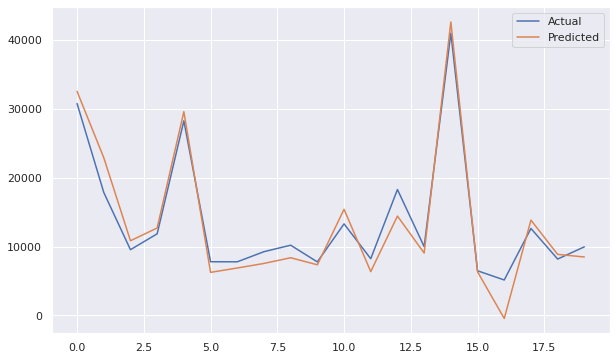

In [129]:
plot_predictions(lr, X_test_clean, y_test_clean)

In [130]:
las = Lasso().fit(X_train_clean, y_train_clean)
evaluate_regression(clean_evals,las, "Lasso Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Training Error Lasso Regression 1506.178640696859  Test error Lasso Regression 2346.7039062019467
R2 score for Lasso Regression training is 96.31806378046402  and for test is 93.12403325733982


In [131]:
reduced_las = LinearRegression().fit(X_train_r, y_train_r)
evaluate_regression(reduced_evals,reduced_las, "Reduced Lasso Regression", X_train_r, X_test_r, y_train_r, y_test_r)

Training Error Reduced Lasso Regression 2309.4286963220775  Test error Reduced Lasso Regression 2500.4577112401557
R2 score for Reduced Lasso Regression training is 91.34369783394949  and for test is 92.19350289610023


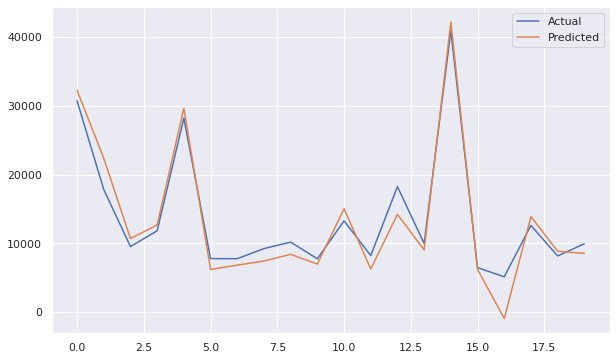

In [132]:
plot_predictions(las, X_test_clean, y_test_clean)

### Ridge regression
Ridge regression is used to solving the problem of multicollinearity when the
independent variables are highly correlated with each other, and the
correlation matrix will be singular and we can’t obtain a unique parameter.

In [133]:
rlr = Ridge(alpha=0.9).fit(X_train_clean, y_train_clean)
evaluate_regression(clean_evals,rlr, "Ridge Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Training Error Ridge Regression 1636.4610667552765  Test error Ridge Regression 2124.0507152098407
R2 score for Ridge Regression training is 95.65355041126881  and for test is 94.3669067702586


In [134]:
reduced_rlr = Ridge(alpha=0.9).fit(X_train_r, y_train_r)
evaluate_regression(reduced_evals,reduced_rlr, "Reduced Ridge Regression", X_train_r, X_test_r, y_train_r, y_test_r)

Training Error Reduced Ridge Regression 2317.768020530537  Test error Reduced Ridge Regression 2508.384116535092
R2 score for Reduced Ridge Regression training is 91.2810693190458  and for test is 92.1439315436955


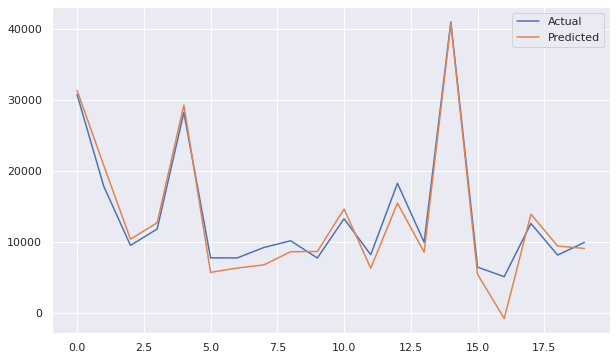

In [135]:
plot_predictions(rlr, X_test_clean, y_test_clean)

### Robust regression(Huber Regressor) 
The Huber loss function has the advantage of not being heavily influenced by the outliers while not completely ignoring their effect.

In [136]:
huber = HuberRegressor().fit(X_train_clean, y_train_clean)
evaluate_regression(clean_evals,huber, "Robust Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Training Error Robust Regression 1753.284189057278  Test error Robust Regression 2302.333862768272
R2 score for Robust Regression training is 95.01083433506506  and for test is 93.38158832722203


In [137]:
huber_r = HuberRegressor().fit(X_train_r, y_train_r)
evaluate_regression(reduced_evals,huber_r, "Reduced Robust Regression", X_train_r, X_test_r, y_train_r, y_test_r)

Training Error Reduced Robust Regression 2420.177995013769  Test error Reduced Robust Regression 2160.6467926911982
R2 score for Reduced Robust Regression training is 90.49356007920434  and for test is 94.17112516715022


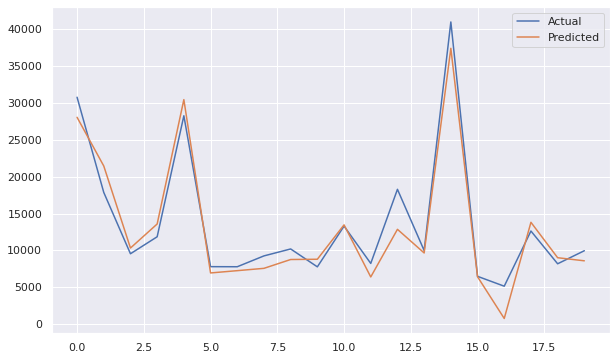

In [138]:
plot_predictions(huber, X_test_clean, y_test_clean)

### Using RandomForest with 100 estimator

In [139]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train_clean, y_train_clean)
evaluate_regression(clean_evals,rf, "RandomForest Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Training Error RandomForest Regression 831.6217323651019  Test error RandomForest Regression 2190.9366663393885
R2 score for RandomForest Regression training is 98.87752945830516  and for test is 94.00655089086783


In [140]:
rf_r = RandomForestRegressor(n_estimators=100).fit(X_train_r, y_train_r)
evaluate_regression(reduced_evals,rf_r, "Reduced RandomForest Regression", X_train_r, X_test_r, y_train_r, y_test_r)

Training Error Reduced RandomForest Regression 1021.8658093844558  Test error Reduced RandomForest Regression 2246.268709666328
R2 score for Reduced RandomForest Regression training is 98.30522898132914  and for test is 93.69999941326684


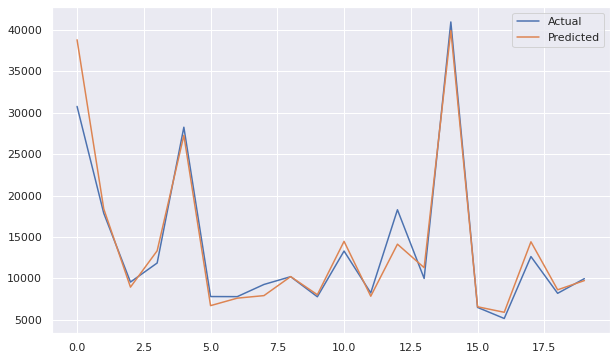

In [141]:
plot_predictions(rf, X_test_clean, y_test_clean)

### Using XGBOOST Regressor

In [142]:
xg_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 20).fit(X_train_clean, y_train_clean)
evaluate_regression(clean_evals,xg_r, "XGBOOST Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

[12:51:37] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Training Error XGBOOST Regression 507.8587036047023  Test error XGBOOST Regression 1910.6462687255778
R2 score for XGBOOST Regression training is 99.58139048893806  and for test is 95.44196394699284


In [143]:
r_xg_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 20).fit(X_train_r, y_train_r)
evaluate_regression(reduced_evals,r_xg_r, "Reduced XGBOOST Regression", X_train_r, X_test_r, y_train_r, y_test_r)

[12:51:37] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Training Error Reduced XGBOOST Regression 382.83812331175125  Test error Reduced XGBOOST Regression 1643.5050649904827
R2 score for Reduced XGBOOST Regression training is 99.76212234456308  and for test is 96.62744323162076


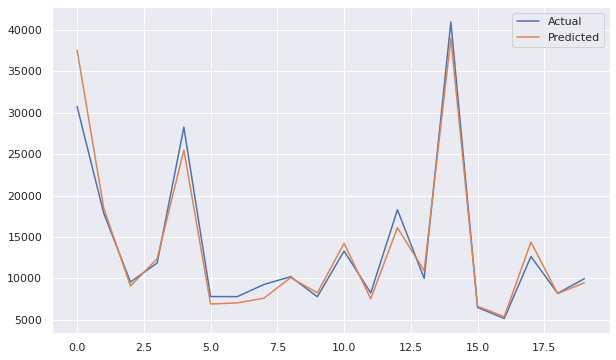

In [144]:
plot_predictions(xg_r, X_test_clean, y_test_clean)

### Using a Artificial Neural Network as a regressor

In [145]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train_clean.shape[1:])),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer = "adam", loss=tf.keras.losses.mean_squared_error )

In [146]:
history = model.fit(X_train_clean, y_train_clean, validation_data=(X_test_clean, y_test_clean), epochs=250, verbose=0)

In [147]:
evaluate_regression(clean_evals, model, "ANN Regressor", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Training Error ANN Regressor 1675.5681098093162  Test error ANN Regressor 2459.3833243853533
R2 score for ANN Regressor training is 95.44333118875183  and for test is 92.44786711614601


In [148]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [MSE]')
    plt.legend()
    plt.grid(True)

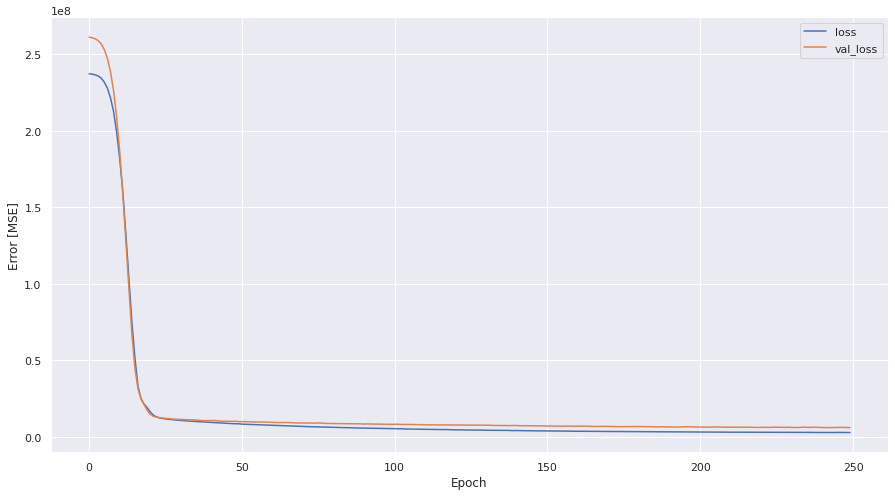

In [149]:
plot_loss(history)

In [150]:
def visualize_errors(evals, data):
    keys = [key for key in evals.keys()]
    values = [value for value in evals.values()]
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='g', width=0.25, align='center')
    ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='b', width=0.25, align='center')
    ax.legend(["Training RMSE", "Test RMSE"])
    ax.set_xticklabels(keys)
    ax.set_xticks(np.arange(len(keys)))
    plt.ylim(0, 3000)
    plt.ylabel("RMSE  " + str(data))
    plt.show()

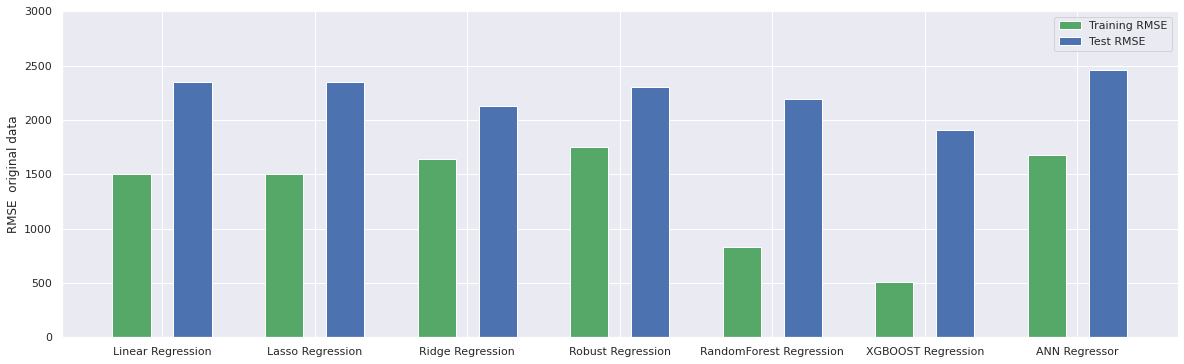

In [151]:
visualize_errors(clean_evals, 'original data')

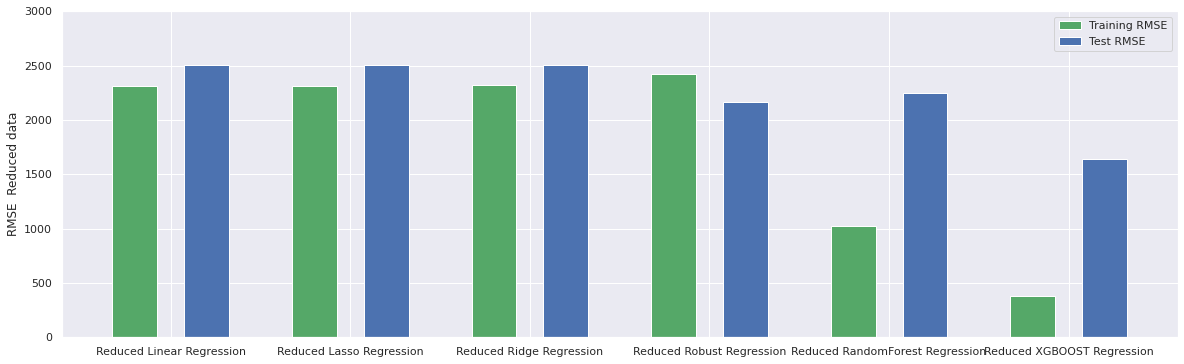

In [152]:
visualize_errors(reduced_evals, 'Reduced data')

In [153]:
def visualize_r2(evals, data):
    keys = [key for key in clean_evals.keys()]
    values = [value for value in clean_evals.values()]
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.bar(np.arange(len(keys)), [value[2] for value in values], width=0.4, color='r', align='center')
    ax.set_xticklabels(keys)
    ax.legend(['R2  '+str(data)])
    plt.ylabel("R2  " + str(data))
    ax.set_xticks(np.arange(len(keys)))
    plt.show()

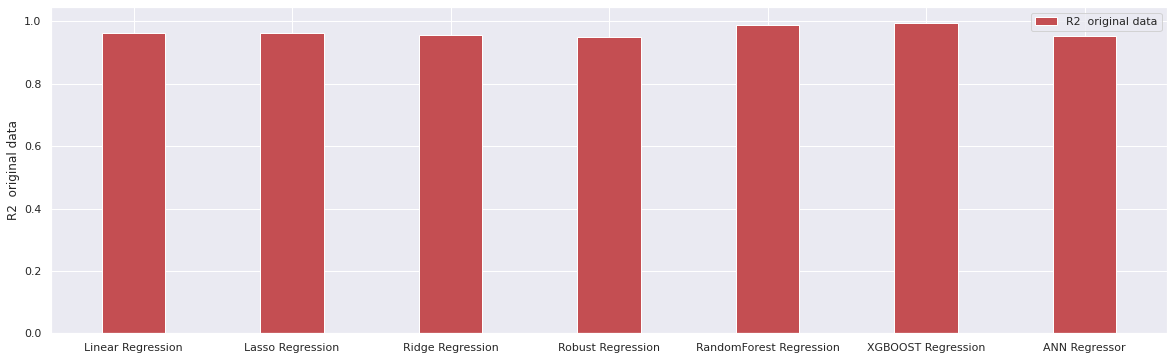

In [154]:
visualize_r2(clean_evals, "original data")

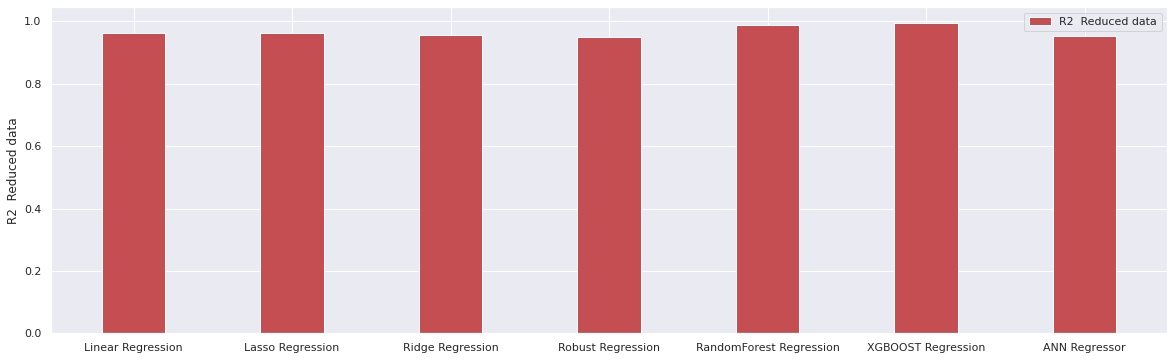

In [155]:
visualize_r2(reduced_evals, "Reduced data")


## Conclusions

* We used several regression models to fit our data and it seems that they all succeeded to fit the data well and this indicated that the data preprocessing stage was also a success but we're still facing the problem of overfitting so I see that all models are truly promising and ready for the next stage of improvement to reduce overfitting.
* We also noticed that the PCA could actually preserve the varience in data we reduced features number from 73 to 29 and still could manage a fair performance on our models with just a slight difference from the original dataset disregarding The huge overfitting with Linear and Lasso regression models on the reduced data.